In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 확인

In [83]:
pc = pd.read_csv('data/PMOD_clean.csv')
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               168 non-null    int64  
 1   positivity       168 non-null    object 
 2   Sex              168 non-null    int64  
 3   Age              168 non-null    int64  
 4   Onset age        168 non-null    int64  
 5   Eduction         168 non-null    int64  
 6   PET ligand type  168 non-null    int64  
 7   Diagnosis code   168 non-null    int64  
 8   APOE             168 non-null    object 
 9   SNSB             168 non-null    int64  
 10  MMSE             168 non-null    int64  
 11  CDR              168 non-null    float64
 12  CDR-SOB          168 non-null    float64
 13  GDS              168 non-null    int64  
 14  SGDepS           168 non-null    int64  
 15  FC               168 non-null    float64
 16  LTC              168 non-null    float64
 17  MTC             

In [84]:
pc.head()

,ID,positivity,Sex,Age,Onset age,Eduction,PET ligand type,Diagnosis code,APOE,SNSB,...,GCA,GCP,CN,PUT,THA,PQ,Pons,Mid,Composite*,CBLCTX
0,6428732,BAPL1,1,70,70,7,1,0,E3/E3,1,...,1.240083,1.217572,1.202508,1.159988,1.093350,1.082448,1.884322,1.562976,1.138931,1.0
1,6683990,BAPL1,1,71,66,11,1,4,E3/E3,1,...,1.202175,1.254068,1.346209,1.165739,1.206144,1.152542,1.828633,1.500693,1.144369,1.0
2,24771520,BAPL1,1,70,69,16,1,3,E3/E3,1,...,1.281024,1.303034,1.364038,1.211458,0.993407,1.124645,2.005075,1.542578,1.179467,1.0
3,1618424,BAPL1,1,74,73,4,1,5,E3/E3,1,...,1.205085,1.298931,1.225121,1.201759,1.030969,1.135626,1.845699,1.517475,1.153163,1.0
4,2017376,BAPL1,1,78,0,12,1,0,E3/E3,1,...,1.045087,1.186780,1.293150,1.072713,1.087730,1.075660,1.619479,1.525412,1.054805,1.0


In [85]:
pc.columns

Index(['ID', 'positivity', 'Sex', 'Age', 'Onset age', 'Eduction',
       'PET ligand type', 'Diagnosis code', 'APOE', 'SNSB', 'MMSE', 'CDR',
       'CDR-SOB', 'GDS', 'SGDepS', 'FC', 'LTC', 'MTC', 'PC', 'OC', 'GCA',
       'GCP', 'CN', 'PUT', 'THA', 'PQ', 'Pons', 'Mid', 'Composite*', 'CBLCTX'],
      dtype='object')

# Category Encoder

In [86]:
pc['positivity'] = pc['positivity'].astype('category').cat.codes
pc['APOE'] = pc['APOE'].astype('category').cat.codes

In [87]:
pc.head()

,ID,positivity,Sex,Age,Onset age,Eduction,PET ligand type,Diagnosis code,APOE,SNSB,...,GCA,GCP,CN,PUT,THA,PQ,Pons,Mid,Composite*,CBLCTX
0,6428732,0,1,70,70,7,1,0,2,1,...,1.240083,1.217572,1.202508,1.159988,1.093350,1.082448,1.884322,1.562976,1.138931,1.0
1,6683990,0,1,71,66,11,1,4,2,1,...,1.202175,1.254068,1.346209,1.165739,1.206144,1.152542,1.828633,1.500693,1.144369,1.0
2,24771520,0,1,70,69,16,1,3,2,1,...,1.281024,1.303034,1.364038,1.211458,0.993407,1.124645,2.005075,1.542578,1.179467,1.0
3,1618424,0,1,74,73,4,1,5,2,1,...,1.205085,1.298931,1.225121,1.201759,1.030969,1.135626,1.845699,1.517475,1.153163,1.0
4,2017376,0,1,78,0,12,1,0,2,1,...,1.045087,1.186780,1.293150,1.072713,1.087730,1.075660,1.619479,1.525412,1.054805,1.0


In [88]:
# 결측치 확인
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

        if i == len(dataframe.columns) - 1 and counted_missing_col == 0:
            print('결측치가 존재하지 않습니다')

check_missing_col(pc)

결측치가 있는 컬럼은: CBLCTX입니다
총 1개의 결측치가 존재합니다.


# 데이터 분포 확인

## 기초 통계

In [49]:
pc.describe()

,ID,positivity,Sex,Age,Onset age,Eduction,PET ligand type,Diagnosis code,APOE,SNSB,...,GCA,GCP,CN,PUT,THA,PQ,Pons,Mid,Composite*,CBLCTX
count,1.680000e+02,168.00000,168.000000,168.000000,168.000000,168.000000,168.0,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,167.0
mean,1.921235e+07,1.10119,0.666667,72.130952,61.273810,9.190476,1.0,3.732143,2.333333,0.994048,...,1.586269,1.720095,1.536689,1.403221,1.382731,1.523057,1.831688,1.556833,1.463291,1.0
std,1.405381e+07,0.95177,0.472814,7.164917,23.744575,4.386905,0.0,1.301649,0.880029,0.077152,...,0.362894,0.399780,0.288611,0.242246,0.326232,0.373981,0.184139,0.130625,0.298831,0.0
min,5.650900e+05,0.00000,0.000000,44.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,...,0.920925,1.010797,0.999902,0.961542,0.799964,0.805195,0.923029,0.988218,0.951411,1.0
25%,1.069566e+07,0.00000,0.000000,68.000000,62.750000,6.000000,1.0,3.000000,2.000000,1.000000,...,1.235436,1.328896,1.297675,1.190624,1.086129,1.135550,1.735621,1.476659,1.176311,1.0
50%,2.380418e+07,2.00000,1.000000,73.500000,68.500000,9.000000,1.0,3.000000,2.000000,1.000000,...,1.585862,1.759098,1.476279,1.353412,1.358624,1.551119,1.852541,1.555446,1.447571,1.0
75%,2.525709e+07,2.00000,1.000000,77.000000,74.000000,12.000000,1.0,5.000000,3.000000,1.000000,...,1.886298,2.053070,1.719677,1.594103,1.633932,1.846635,1.937836,1.645797,1.725704,1.0
max,1.630500e+08,2.00000,1.000000,89.000000,86.000000,19.000000,1.0,5.000000,4.000000,1.000000,...,2.352328,2.702124,2.495885,2.347717,2.147100,2.441403,2.259537,1.830536,2.332912,1.0


## 히스토그램

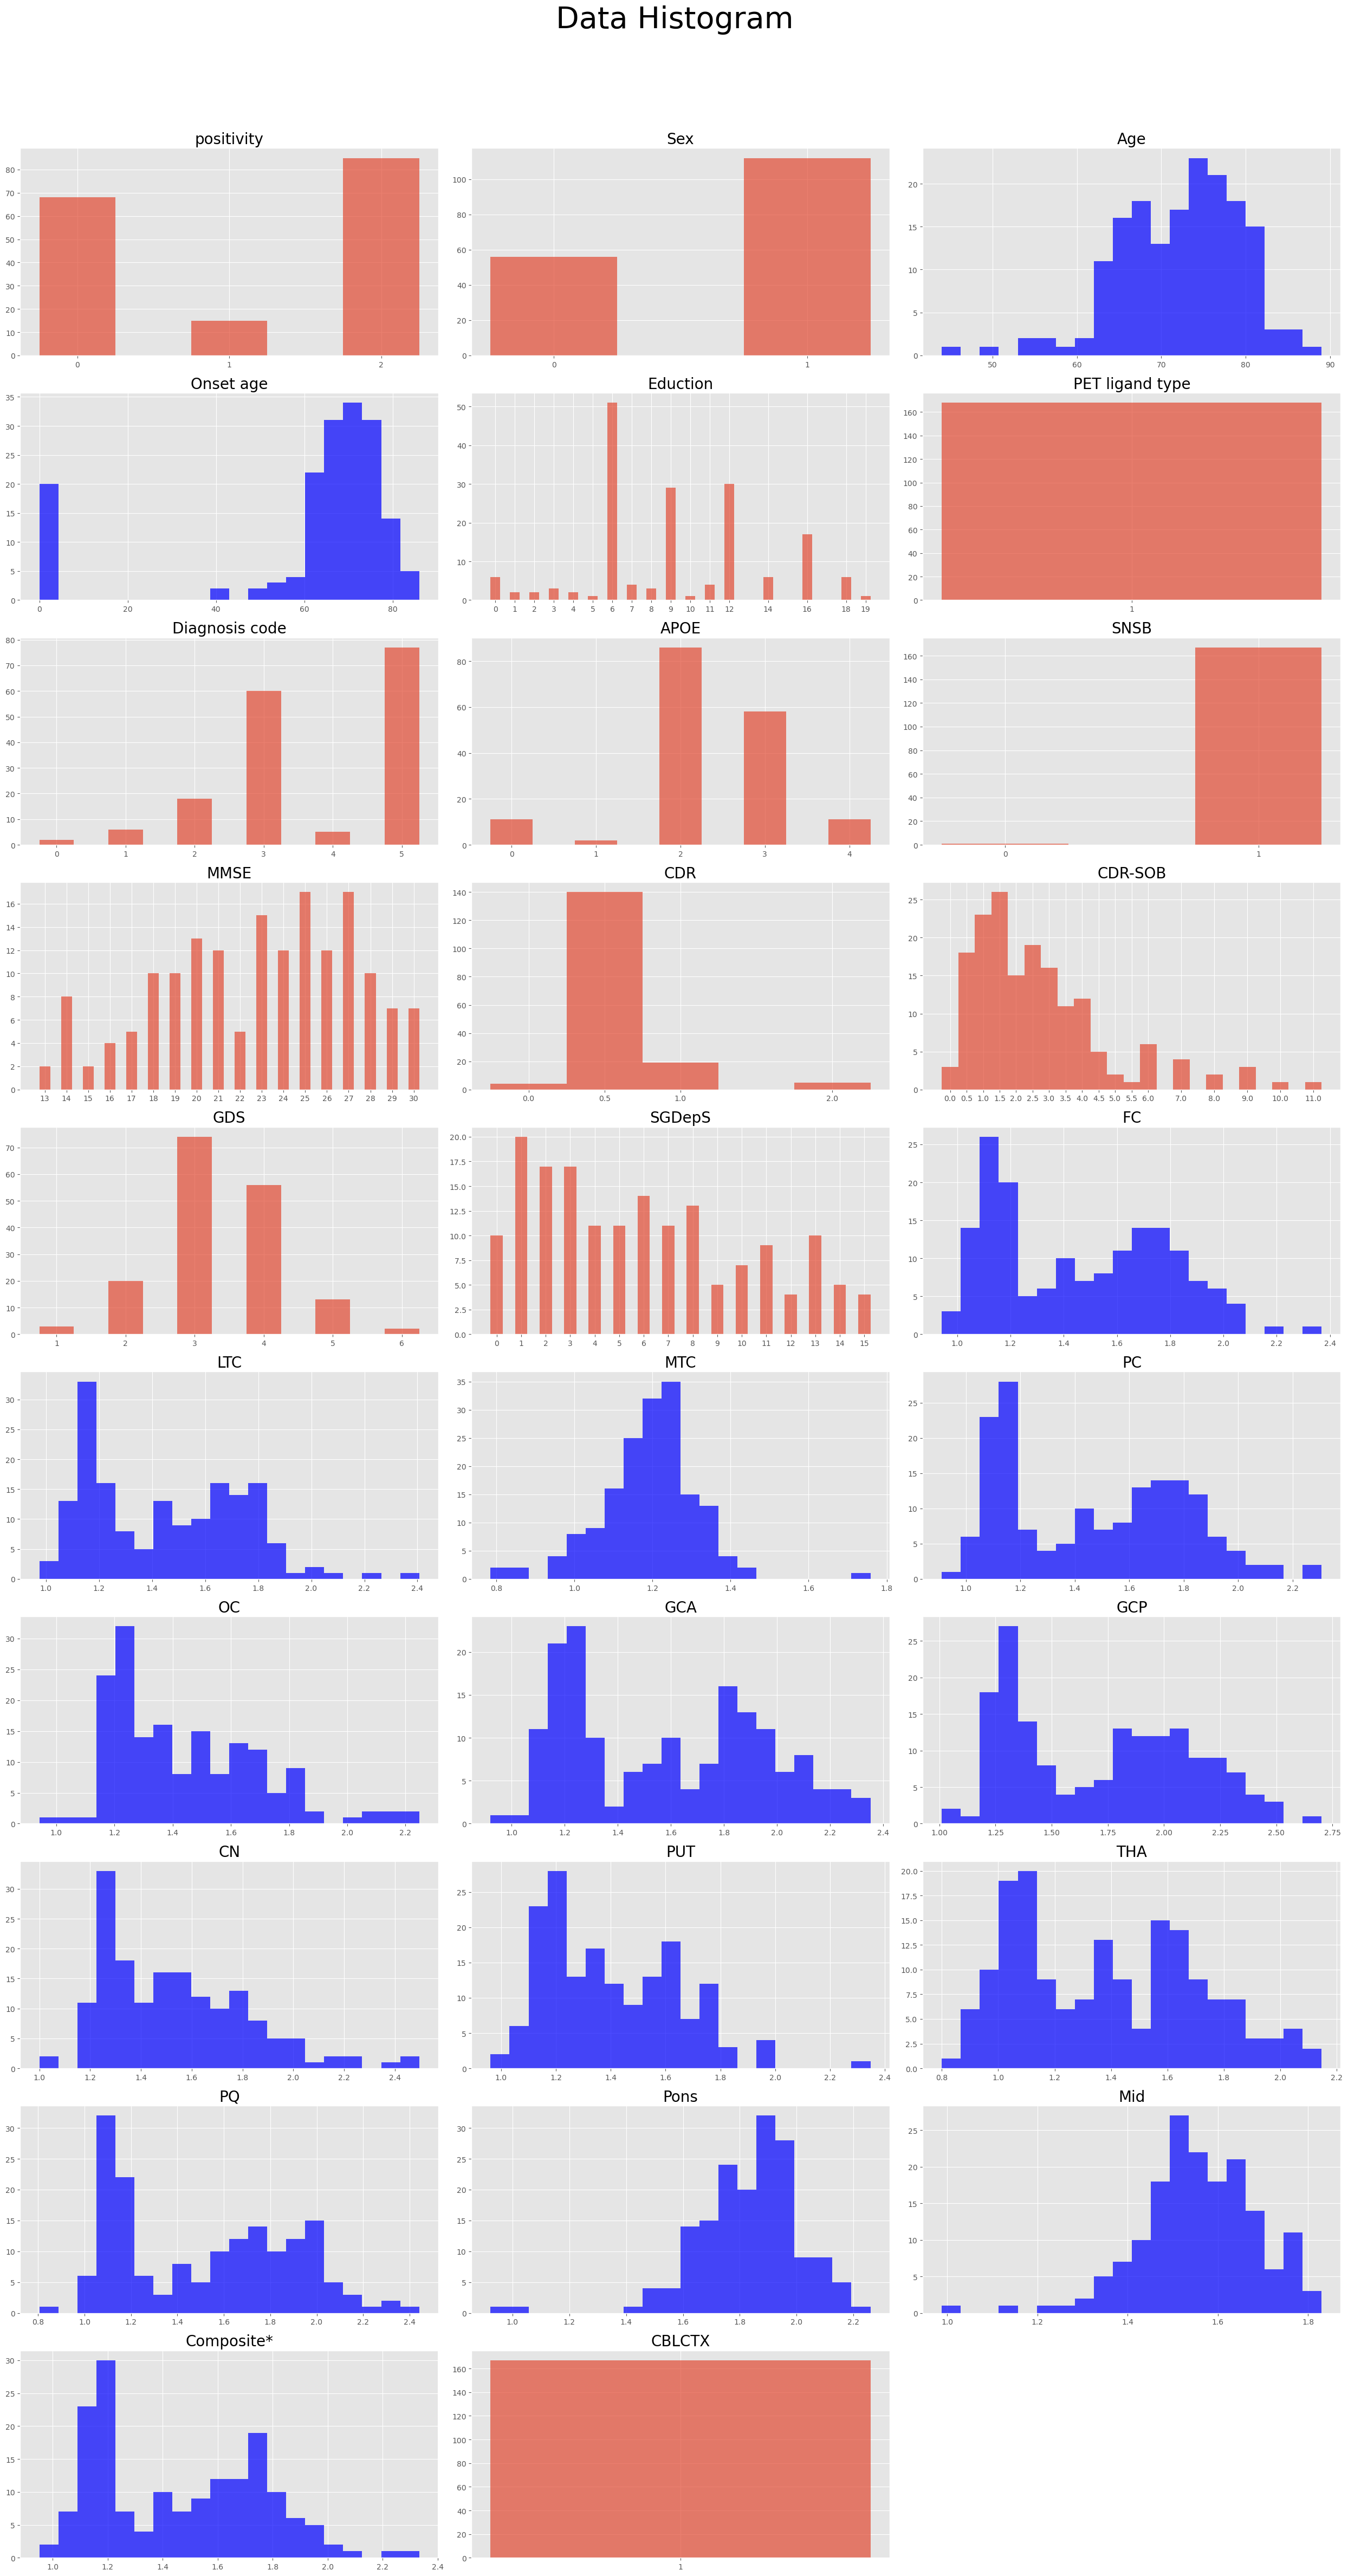

In [90]:
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,50))
plt.suptitle("Data Histogram", fontsize=40)
cols = ['positivity', 'Sex', 'Age', 'Onset age', 'Eduction',
       'PET ligand type', 'Diagnosis code', 'APOE', 'SNSB', 'MMSE', 'CDR',
       'CDR-SOB', 'GDS', 'SGDepS', 'FC', 'LTC', 'MTC', 'PC', 'OC', 'GCA',
       'GCP', 'CN', 'PUT', 'THA', 'PQ', 'Pons', 'Mid', 'Composite*', 'CBLCTX']
for i in range(len(cols)):
    plt.subplot(10,3,i+1)
    plt.title(cols[i], fontsize=20)
    if len(pc[cols[i]].unique()) > 20:
        plt.hist(pc[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = pc[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 바이올린 플롯

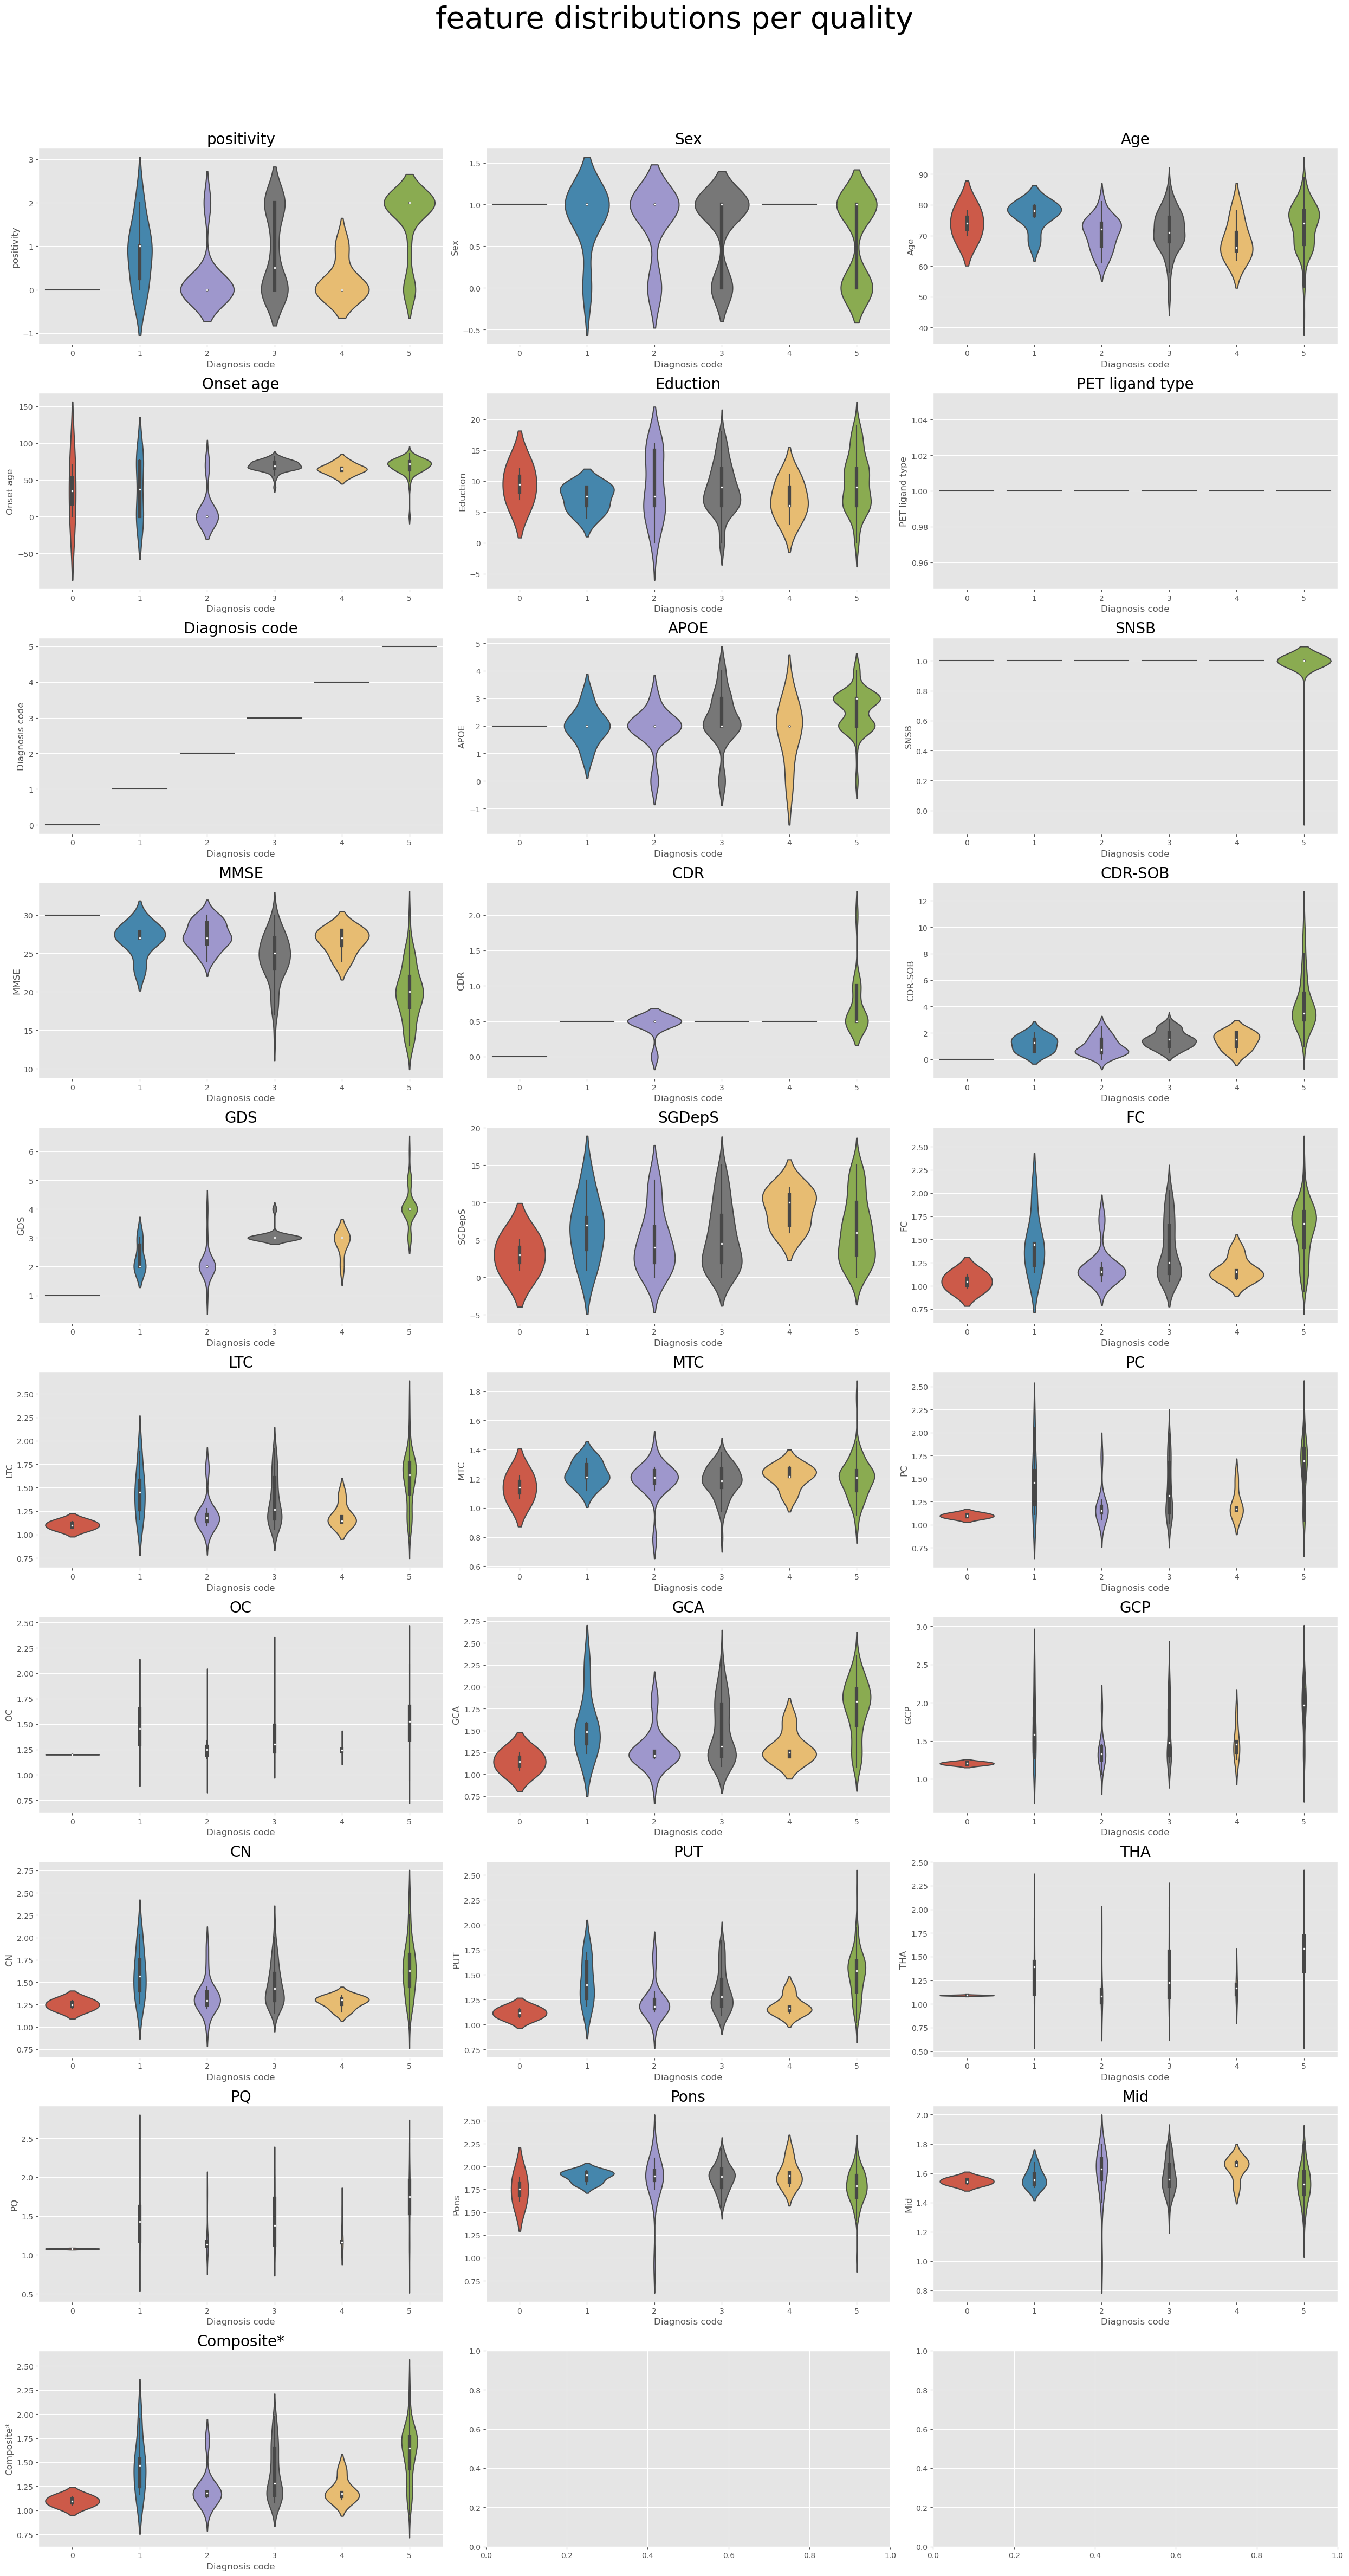

In [91]:
fig, axes = plt.subplots(10, 3, figsize=(25, 50))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, pc.columns[1:-1]):
    sns.violinplot(x = 'Diagnosis code', y = col, ax = ax, data = pc)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 히트맵

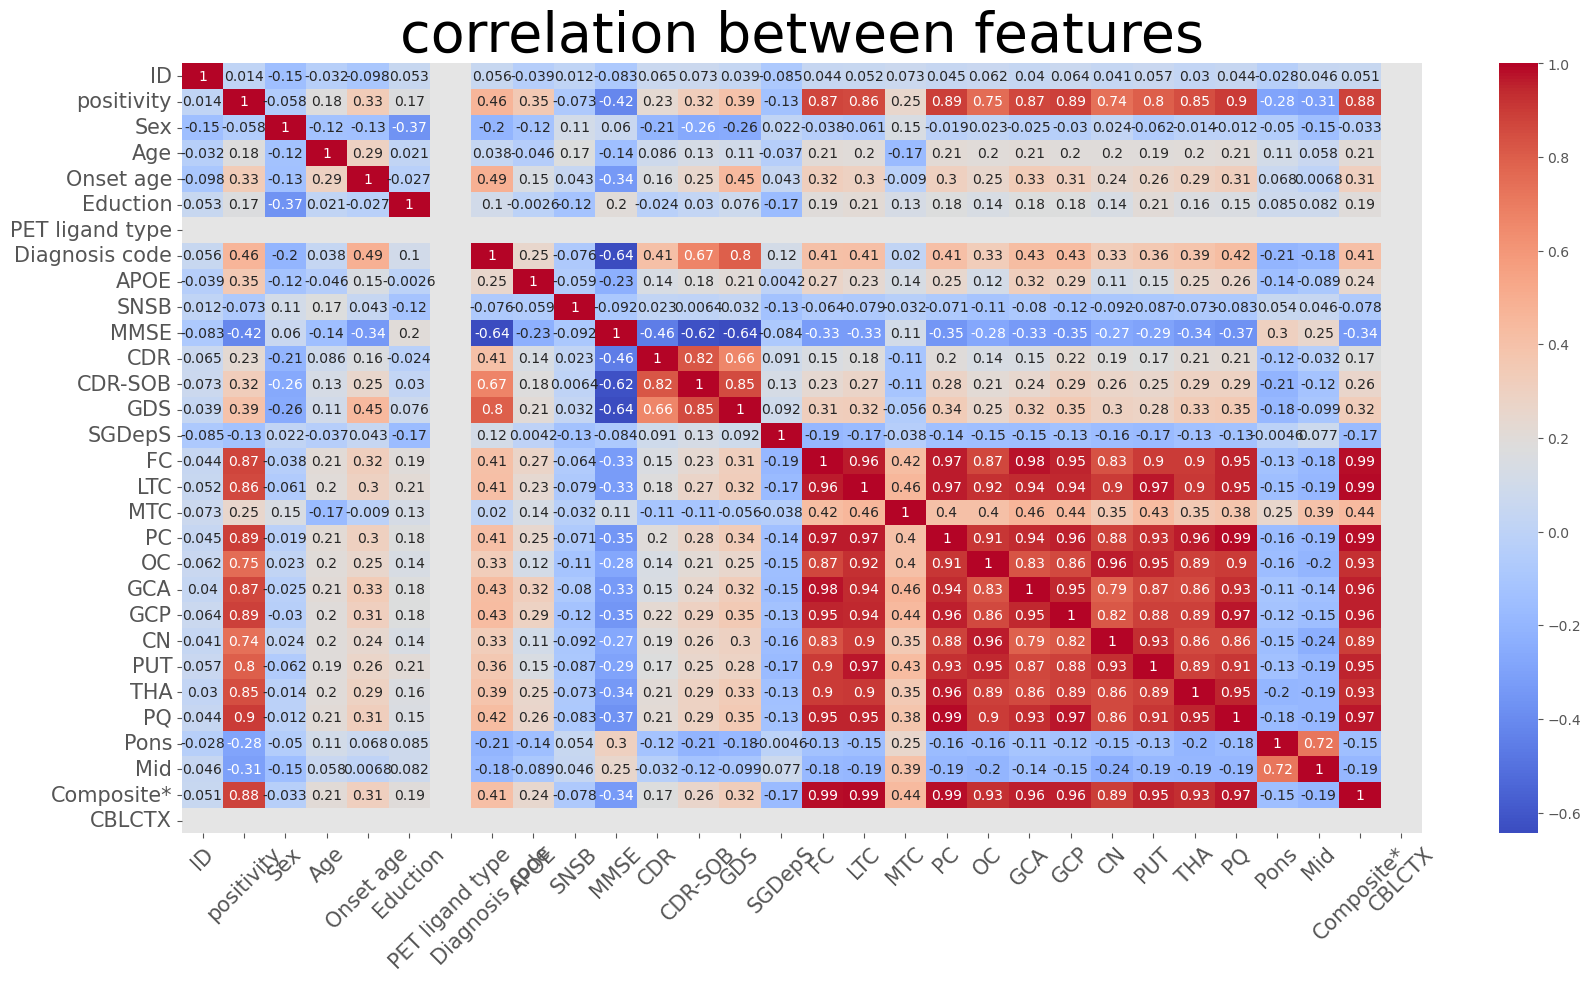

In [92]:
plt.figure(figsize=(20,10))

heat_table = pc.corr()
heatmap_ax = sns.heatmap(heat_table, annot=True, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

# PCA 시각화

In [93]:
for i in pc.columns:
    if len(pc[i].unique()) == 1:
        print(i)

PET ligand type


In [94]:
from sklearn.preprocessing import StandardScaler 

# 먼저 PCA를 위해 데이터를 표준화해줍니다.
data = pc.drop(['ID', 'Diagnosis code', 'PET ligand type', 'CBLCTX'], axis=1).values
target = pc['Diagnosis code'].values

scaled_data = StandardScaler().fit_transform(data)

In [95]:
from sklearn.decomposition import PCA

# 2D 에 시각화하기 위해 주성분을 2개로 선택합니다.
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
principalDf = pd.DataFrame(data=pca_data, columns = ['principal component 1', 'principal component 2'])
principalDf['target'] = target

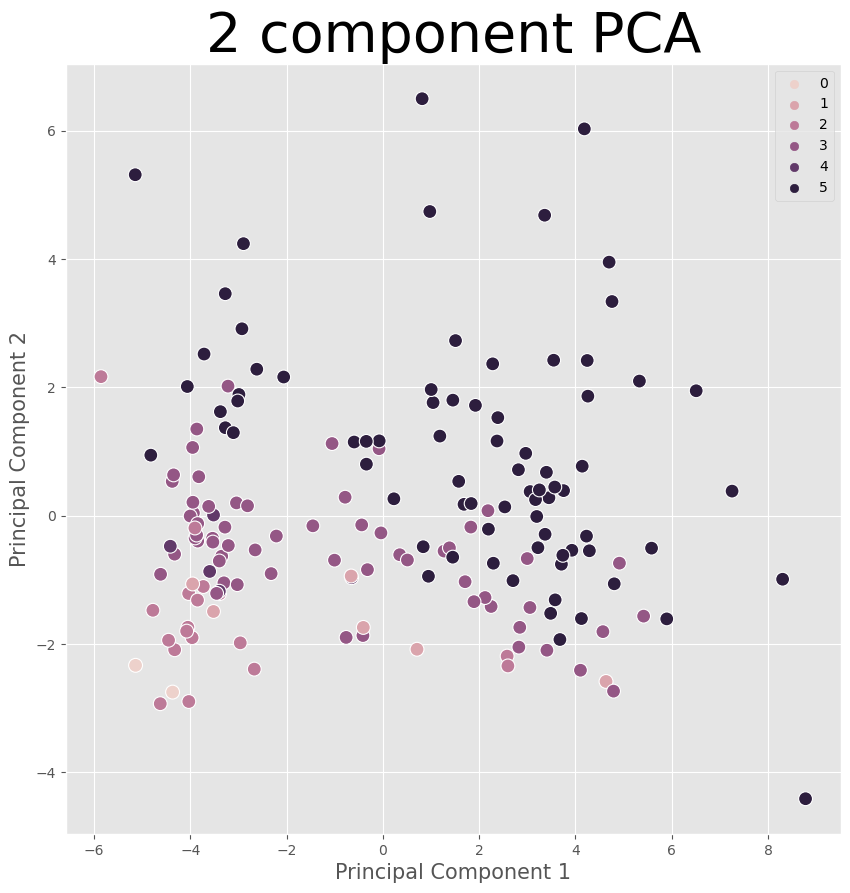

In [104]:
plt.figure(figsize = (10, 10))

plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 40)
sns.scatterplot(x='principal component 1', y='principal component 2', data = principalDf, hue = target,s= 100)
plt.show()